#**PROBLEMA DE NEGOCIO**


---




La urgencia por detectar fraudes en transacciones móviles de dinero ha llevado a una empresa del segmento Fintech a buscar soluciones innovadoras. Como científicos de datos hemos sido convocados para desarrollar un modelo de machine learning que pueda distinguir de manera precisa entre transacciones legítimas y fraudulentas, estableciendo así un estándar de seguridad en el sector financiero móvil global.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la detección de transacciones bancarias fraudulentas.

#**1. Configuración del Ambiente**


---




In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
!pip install -U imbalanced-learn
!pip install ydata-profiling
from ydata_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
global df_banco, resultados

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=59105bedb4ed372c6ceff9527e3e2e15726002ae98e1ef70b4265ed046e9c987
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


#**2. Preprocesamiento de Datos**


---


In [2]:
df_banco = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df_banco.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [3]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Conocimiento de las variables

*   **STEP: Se han identificado 744 registros**. Considerando un mes de 31 días, se puede realizar la conversión de "Step" a un formato horario de 24 horas distribuido a lo largo de los 31 días. Esto permitirá un análisis más detallado del comportamiento temporal de los datos.

*   **TYPE:** **Se identifican 5 tipos de transacciones:**


1.   CASH_OUT (2,237,500 transacciones): Este tipo de transacción refleja la salida de dinero de la cuenta de un cliente, como puede ser a través de retiros de efectivo.
2.   PAYMENT (2,151,495 transacciones):Este tipo de transacción generalmente involucra el pago de servicios, como el pago de facturas.
3.   CASH_IN (1,399,284 transacciones): Las transacciones de CASH-IN representan el ingreso de dinero a la cuenta de un cliente. Estas pueden involucrar depósitos de dinero efectivo, transferencias de fondos recibidas de otras cuentas, o cualquier otra forma de ingreso monetario.
4.   TRANSFER (532,909 transacciones): Las TRANSFERENCIAS implican mover dinero de la cuenta de un cliente a otra cuenta, ya sea dentro del mismo banco o entre diferentes bancos.
5.   DEBIT (41,432 transacciones): Similar a CASH_OUT, pero más comúnmente asociado con pequeñas cantidades. Esto incluye el uso de tarjetas de débito para transacciones diarias, indican compras o pagos realizados usando fondos directamente de la cuenta del cliente.

*   **TYPE2:** **Clasificación de Usuarios en Transacciones:** Se ha identificado que la letra inicial de las cuentas de origen y destinatario es indicativa del tipo de usuario: 'C' para clientes y 'M' para comercios. Esto ha motivado la creación de la variable "TYPE2", que facilita la identificación y diferenciación de los tipos de usuarios involucrados en las transacciones. Esta clasificación es esencial para realizar análisis específicos relacionados con el comportamiento de transacción de clientes versus comercios, proporcionando así insights valiosos sobre las interacciones entre estos dos grupos.

In [4]:
#STEP
conteo_step = df_banco['step'].value_counts()
print(conteo_step)

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64


In [5]:
# TYPE
conteo_type = df_banco['type'].value_counts()
conteo_type

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [6]:
# Crear la nueva columna 'type2' combinando la primera letra de 'nameOrig' y 'nameDest'
df_banco['type2'] = df_banco['nameOrig'].str[0] + df_banco['nameDest'].str[0]
print(df_banco[['nameOrig', 'nameDest', 'type2']])

            nameOrig     nameDest type2
0        C1231006815  M1979787155    CM
1        C1666544295  M2044282225    CM
2        C1305486145   C553264065    CC
3         C840083671    C38997010    CC
4        C2048537720  M1230701703    CM
...              ...          ...   ...
6362615   C786484425   C776919290    CC
6362616  C1529008245  C1881841831    CC
6362617  C1162922333  C1365125890    CC
6362618  C1685995037  C2080388513    CC
6362619  C1280323807   C873221189    CC

[6362620 rows x 3 columns]


In [7]:
## No se identifican valores nulos

total_nulos = df_banco.isnull().sum().sum()
print(total_nulos)

0


**INSIGTH VALIOSOS SOBE LA INFORMACION RECABADA**

**Análisis Detallado de Transacciones Fraudulentas**

*   De un total de registros analizados, 8,213 transacciones fueron clasificadas como fraudulentas, lo que representa un índice de fraude del 0.129%. Adicionalmente, el porcentaje de fraude en relación al monto total involucrado es del 1.053%. Este dato destaca una discrepancia importante entre la frecuencia de fraudes y su impacto económico, sugiriendo que, aunque el número de fraudes es relativamente bajo, el valor monetario afectado es considerablemente más significativo.

**Canales de Transacción Vulnerables:**

*   Las únicas modalidades de transacción donde se detectaron actividades fraudulentas fueron CASH_OUT y TRANSFER. Esto indica que estos canales son particularmente susceptibles al fraude, probablemente debido a la naturaleza de las transacciones que facilitan movimientos de fondos grandes y rápidos.

Se presenta un analisis de porque estas dis categoriaspodrian estar mas expuestas al fraude:

1.   TRANSFERENCIA

**Alto Volumen Monetario:** Las transferencias suelen involucrar grandes
cantidades de dinero. Esto las convierte en un objetivo atractivo para los defraudadores que buscan maximizar el retorno de sus actividades ilegales.
**Anonimato y Complejidad:** Las transferencias pueden cruzar fronteras internacionales y ser dirigidas a jurisdicciones con menor regulación o supervisión. Esto puede dificultar el rastreo del origen y el destino final de los fondos, proporcionando un cierto grado de anonimato.
**Manipulación de Cuentas y Falsificación de Identidades:** Los defraudadores pueden usar identidades robadas o ficticias para abrir cuentas, desde las cuales realizan transferencias fraudulentas. La dificultad para verificar la autenticidad de las partes involucradas en la transferencia facilita este tipo de fraude.

2.   CASH OUT

**Extracción Rápida de Fondos:** Este tipo de transacción permite a los defraudadores convertir rápidamente dinero ilícito en efectivo, que es más difícil de rastrear que los movimientos de cuenta a cuenta. Esto es particularmente útil para blanquear dinero obtenido a través de actividades ilícitas.
**Uso de Cajeros Automáticos y Tecnología:** Los fraudes en "CASH OUT" pueden involucrar el uso de dispositivos de skimming en cajeros automáticos o el hacking de cuentas para realizar retiros no autorizados.
**Vulnerabilidades en la Seguridad:** Las transacciones de retiro de efectivo pueden explotar vulnerabilidades en los sistemas de seguridad de los bancos, como la explotación de tarjetas clonadas o el uso de fallos de seguridad en las redes de cajeros automáticos.


**Menor Susceptibilidad de Otros Tipos**

**CASH IN:** Generalmente involucra el depósito de fondos en cuentas, lo cual es menos atractivo para los defraudadores ya que implica poner dinero en lugar de sacarlo.
**PAGO y DÉBITO:** Estos tipos de transacciones suelen ser de menor cuantía y están más directamente vinculados a actividades diarias legítimas (como pagar facturas o compras). Además, son más fáciles de rastrear y verificar por las entidades financieras y comerciales, lo que disminuye el interés y las oportunidades de fraude.

**Naturaleza de las Cuentas Involucradas:**

*   Se observó que los fraudes involucraron principalmente transacciones entre cuentas de origen y destinatarias que pertenecen a clientes. Esto podría indicar una explotación de vulnerabilidades en la gestión de cuentas cliente-cliente.


## FRAUDE

### Análisis del Porcentaje de Fraude

**Porcentaje de Transacciones Fraudulentas:**



*   Porcentaje de Transacciones Fraudulentas: 0.13%
*   Total de Transacciones: 6,362,620
*   Transacciones Fraudulentas: 8,213

El porcentaje de transacciones fraudulentas es relativamente bajo, situándose en el 0.13%. Esto indica que, en términos de la cantidad de transacciones, la incidencia de fraude es mínima.

**Porcentaje del Monto de Fraude:**

*   Porcentaje del Monto de Fraude: 1.05%
*   Monto Total de las Transacciones: 1144392944759.77
*   Monto Total de las Transacciones Fraudulentas: 12056415427.83


El porcentaje del monto de fraude es significativamente mayor, situándose en el 1.05%. Esto indica que, aunque el número de transacciones fraudulentas es bajo, el valor monetario de estas transacciones fraudulentas es considerablemente alto. Este es un indicador crucial que sugiere que las transacciones fraudulentas tienden a involucrar montos elevados, lo que puede tener un impacto financiero significativo en la organización.

**Estrategias de Mitigación:**

*   Análisis de Patrón: Realizar un análisis más profundo para identificar patrones comunes en las transacciones fraudulentas de alto valor.
*   Fortalecimiento de Controles: Implementar controles adicionales para transacciones de alto valor, como autenticaciones adicionales o revisiones manuales.
*   Educación y Concienciación: Aumentar la concienciación entre los clientes y empleados sobre las tácticas de fraude, especialmente en operaciones de mayor monto.

In [8]:
# ISFRAUDE
conteo_fraude = df_banco['isFraud'].value_counts()
conteo_fraude

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [9]:
## PORCENTAJE FRAUDE
print((8213/6362620)*100,'%')

0.12908204481801522 %


#### Procentaje de fraude por monto de transacciones

In [10]:
transacciones_fraudulentas = df_banco[df_banco['isFraud'] == 1]
suma_monto_fraude = transacciones_fraudulentas['amount'].sum()
print(suma_monto_fraude)

suma_monto = df_banco['amount'].sum()
print(suma_monto)

12056415427.839998
1144392944759.77


In [11]:
## PORCENTAJE FRAUDE
print((12056415427.839998/1144392944759.77)*100,'%')

1.0535206008606486 %


In [12]:
# ISFRAUDE ARGUPADO
conteo_fraude_type = df_banco.groupby('type')['isFraud'].value_counts()
print(conteo_fraude_type)

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: count, dtype: int64


In [13]:
# ISFRAUDE ARGUPADO TYPE 2
conteo_fraude_type2 = df_banco.groupby('type2')['isFraud'].value_counts()
print(conteo_fraude_type2)

type2  isFraud
CC     0          4202912
       1             8213
CM     0          2151495
Name: count, dtype: int64


In [14]:
df_duplicados = df_banco[df_banco.duplicated(keep = False)]
df_duplicados.head()

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud, type2]
Index: []

**DESCRIPTIVOS**

**Análisis del DataFrame df_fraude**

*   Se tienen 8213 registros de fraude


*   Standard Deviation (Desviación Estándar):Las altas desviaciones estándar en amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, y newbalanceDest sugieren una amplia variabilidad en los montos de las transacciones fraudulentas.

*   Monto Promedio: El monto promedio en df_fraude es significativamente mayor que en df_banco, lo que podría indicar que las transacciones fraudulentas tienden a ser por montos mayores.


*   Balance en Destino: Aunque el oldbalanceDest en df_fraude tiene una media de 544,249.6, este no es tan alto como podría esperarse, indicando que muchas cuentas de destino no tienen grandes sumas antes de la transacción fraudulenta, apoyando la observación de que a menudo se usan cuentas con poco o ningún saldo previo.

*   Un patrón recurrente observado en actividades fraudulentas es cuando el monto de la transacción coincide exactamente con el saldo disponible en la cuenta de origen. Este comportamiento puede indicar un intento deliberado de vaciar completamente la cuenta, lo cual es una táctica común entre los defraudadores. Identificar transacciones donde el monto es igual al saldo inicial puede ser una regla de negocio efectiva para detectar y prevenir este tipo de fraude. Implementar este criterio como parte de las estrategias de monitoreo y control permite interceptar acciones sospechosas antes de que resulten en pérdidas significativas, mejorando así la seguridad financiera y la confianza del cliente.

In [15]:
df_fraude = df_banco[df_banco['isFraud']== 1]

In [16]:
df_fraude.sample(10)

step      type      amount     nameOrig  oldbalanceOrg  \
576360     31  TRANSFER   587031.20  C1909564191      587031.20   
1030614    77  CASH_OUT  2149976.69  C1519673706     2149976.69   
576362     32  TRANSFER    81867.07  C1128786535       81867.07   
2064417   181  TRANSFER   252189.32   C636129537      252189.32   
2982687   231  TRANSFER   261331.82   C829550304      261331.82   
4261        3  CASH_OUT    22877.00  C2126545173       22877.00   
3580338   261  TRANSFER  5039827.29    C60530886     5039827.29   
2382160   198  TRANSFER   152961.49  C1313940667      152961.49   
1932191   172  TRANSFER   800024.12  C1324987757      800024.12   
6201654   578  CASH_OUT   190815.79   C669797835      190815.79   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
576360              0.0  C2047987632            0.00            0.00        1   
1030614             0.0  C1396705699            0.00      2149976.69        1   
576362              0.0     C9901046            0.00            0.00        1   
2064417             0.0  C1515281371            0.00            0.00        1   
2982687             0.0  C1922723403            0.00            0.00        1   
4261                0.0   C573200870            0.00        22877.00        1   
3580338             0.0  C1454703841            0.00            0.00        1   
2382160             0.0   C518686874            0.00            0.00        1   
1932191             0.0   C704140771            0.00            0.00        1   
6201654             0.0  C1179424644      1686901.31      1877717.10        1   

         isFlaggedFraud type2  
576360                0    CC  
1030614               0    CC  
576362                0    CC  
2064417               0    CC  
2982687               0    CC  
4261                  0    CC  
3580338               0    CC  
2382160               0    CC  
1932191               0    CC  
6201654               0    CC

In [17]:
df_banco.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

In [18]:
df_fraude.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  8213.000000  8.213000e+03   8.213000e+03    8.213000e+03   
mean    368.413856  1.467967e+06   1.649668e+06    1.923926e+05   
std     216.388690  2.404253e+06   3.547719e+06    1.965666e+06   
min       1.000000  0.000000e+00   0.000000e+00    0.000000e+00   
25%     181.000000  1.270913e+05   1.258224e+05    0.000000e+00   
50%     367.000000  4.414234e+05   4.389835e+05    0.000000e+00   
75%     558.000000  1.517771e+06   1.517771e+06    0.000000e+00   
max     743.000000  1.000000e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
count    8.213000e+03    8.213000e+03   8213.0     8213.000000  
mean     5.442496e+05    1.279708e+06      1.0        0.001948  
std      3.336421e+06    3.908817e+06      0.0        0.044097  
min      0.000000e+00    0.000000e+00      1.0        0.000000  
25%      0.000000e+00    0.000000e+00      1.0        0.000000  
50%      0.000000e+00    4.676420e+03      1.0        0.000000  
75%      1.478287e+05    1.058725e+06      1.0        0.000000  
max      2.362305e+08    2.367265e+08      1.0        1.000000

#### Creaciòn de variables

In [19]:
# Se crea la columna hora de dia y dia, horal del dia se usara el operador % para transformar cada step en una hora del dia de 0 a 23, la columna de dia, es para determinar el dia en el rango de 1 a 31 dias.
df_banco['hora_del_dia'] = df_banco['step'] % 24
df_banco['dia'] = df_banco['step'] // 24 + 1  # +1 para hacer que el conteo de días comience en 1
print(df_banco[['step', 'hora_del_dia', 'dia']].head(50))

    step  hora_del_dia  dia
0      1             1    1
1      1             1    1
2      1             1    1
3      1             1    1
4      1             1    1
5      1             1    1
6      1             1    1
7      1             1    1
8      1             1    1
9      1             1    1
10     1             1    1
11     1             1    1
12     1             1    1
13     1             1    1
14     1             1    1
15     1             1    1
16     1             1    1
17     1             1    1
18     1             1    1
19     1             1    1
20     1             1    1
21     1             1    1
22     1             1    1
23     1             1    1
24     1             1    1
25     1             1    1
26     1             1    1
27     1             1    1
28     1             1    1
29     1             1    1
30     1             1    1
31     1             1    1
32     1             1    1
33     1             1    1
34     1            

**Variable horario**

Variable horario en tu DataFrame df_banco, clasifica las horas del día en categorías como "Madrugada", "Mañana", "Tarde" y "Noche".



In [20]:
def clasificar_horario(hora):
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

df_banco['horario'] = df_banco['hora_del_dia'].apply(clasificar_horario)

print(df_banco[['hora_del_dia', 'horario']].sample(10))

         hora_del_dia horario
726146             13   Tarde
1483182            21   Noche
4757355            21   Noche
3856721            19   Noche
39727               9  Mañana
5781998            16   Tarde
4491952            12   Tarde
3072349            19   Noche
4974757            16   Tarde
2425031            10  Mañana


**Variable Rango_fondo**

Categorizar los valores de oldbalanceDest según los rangos:

1.   Sin saldo: Cuando oldbalanceDest es igual a 0.
2.   Saldo menor a 147,828.7: Cuando oldbalanceDest es mayor que 0 y menor que 147,828.7.
3.   Saldo superior a 147,828.7: Cuando oldbalanceDest es igual o superior a 147,828.7.



In [21]:
def clasificar_fondo(balance):
    if balance == 0:
        return 'Sin_saldo'

    else:
        return 'Con_saldo'

# Aplicamos la función para crear la nueva columna 'rango_fondo'
df_banco['rango_fondo'] = df_banco['oldbalanceDest'].apply(clasificar_fondo)

# Verificación de los resultados
print(df_banco[['oldbalanceDest', 'rango_fondo']].sample(20))

         oldbalanceDest rango_fondo
3601177            0.00   Sin_saldo
2644687            0.00   Sin_saldo
3484848       389323.03   Con_saldo
3079199            0.00   Sin_saldo
4285397            0.00   Sin_saldo
2695742       503195.48   Con_saldo
1905427            0.00   Sin_saldo
3851008       132665.40   Con_saldo
3138810      3016742.39   Con_saldo
1356029            0.00   Sin_saldo
1817943       722531.58   Con_saldo
5840047      1885564.17   Con_saldo
2631311       918853.31   Con_saldo
2004299            0.00   Sin_saldo
5252250      3547965.72   Con_saldo
2230055            0.00   Sin_saldo
5884599            0.00   Sin_saldo
327743        934732.38   Con_saldo
6218344      4456244.82   Con_saldo
66801              0.00   Sin_saldo


**Variable intento_vaciar**

Esta variable ayuda a identificar si se intentó vaciar la cuenta de origen, una práctica comúnmente observada en incidentes de fraude. Los defraudadores a menudo modifican sus estrategias cuando detectan que un patrón de fraude ha sido identificado, adaptando sus métodos para evitar la detección. En lugar de vaciar completamente las cuentas, pueden optar por dejar un pequeño saldo remanente. Para adaptarse a esta evolución en el comportamiento del fraude, hemos establecido un margen que considera un saldo remanente del 5%. Si el monto de la transacción representa el 95% o más del saldo original, se considera un intento de vaciar la cuenta, capturando así tanto los intentos completos como los casi completos de extracción de fondos.

*   1 = Si intento vaciar cuenta
*   0 = no intento vaciar cuenta

In [22]:
def intento_vaciar_cuenta(amount, oldbalance):

    umbral = 0.95
    if amount >= oldbalance * umbral:
        return 1
    else:
        return 0

#  columna 'intento_vaciar'
df_banco['intento_vaciar'] = df_banco.apply(lambda x: intento_vaciar_cuenta(x['amount'], x['oldbalanceOrg']), axis=1)

# Verificación de los resultados
print(df_banco[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'intento_vaciar']].head())

   step      type    amount  oldbalanceOrg  newbalanceOrig  intento_vaciar
0     1   PAYMENT   9839.64       170136.0       160296.36               0
1     1   PAYMENT   1864.28        21249.0        19384.72               0
2     1  TRANSFER    181.00          181.0            0.00               1
3     1  CASH_OUT    181.00          181.0            0.00               1
4     1   PAYMENT  11668.14        41554.0        29885.86               0


In [23]:
# Agrupar por 'hora_del_dia'
agrupado_por_hora = df_banco.groupby('hora_del_dia').agg({
    'amount': 'sum',    # Suma de los montos para cada hora
    'type': 'count'     # Contar el número de transacciones por hora
}).rename(columns={'type': 'transaction_count'})

print(agrupado_por_hora)

                    amount  transaction_count
hora_del_dia                                 
0             9.133131e+09              71587
1             3.200401e+09              27111
2             1.555136e+09               9018
3             9.178075e+08               2007
4             4.526704e+08               1241
5             6.373555e+08               1641
6             7.331408e+08               3420
7             1.342657e+09               8988
8             4.771772e+09              26915
9             5.723031e+10             283518
10            9.072886e+10             425729
11            8.683629e+10             445992
12            9.536523e+10             483418
13            8.960632e+10             468474
14            8.301986e+10             439653
15            8.813444e+10             416686
16            1.035103e+11             441612
17            8.645000e+10             439941
18            9.090729e+10             580509
19            9.648392e+10        

In [24]:
df_fraude = df_banco[df_banco['isFraud']== 1]

In [25]:
# Agrupar por 'hora_del_dia'
agrupado_por_hora_fraude = df_fraude.groupby('hora_del_dia').agg({
    'amount': 'sum',    # Suma de los montos para cada hora
    'type': 'count'     # Contar el número de transacciones por hora
}).rename(columns={'type': 'transaction_count'})

print(agrupado_por_hora)

                    amount  transaction_count
hora_del_dia                                 
0             9.133131e+09              71587
1             3.200401e+09              27111
2             1.555136e+09               9018
3             9.178075e+08               2007
4             4.526704e+08               1241
5             6.373555e+08               1641
6             7.331408e+08               3420
7             1.342657e+09               8988
8             4.771772e+09              26915
9             5.723031e+10             283518
10            9.072886e+10             425729
11            8.683629e+10             445992
12            9.536523e+10             483418
13            8.960632e+10             468474
14            8.301986e+10             439653
15            8.813444e+10             416686
16            1.035103e+11             441612
17            8.645000e+10             439941
18            9.090729e+10             580509
19            9.648392e+10        

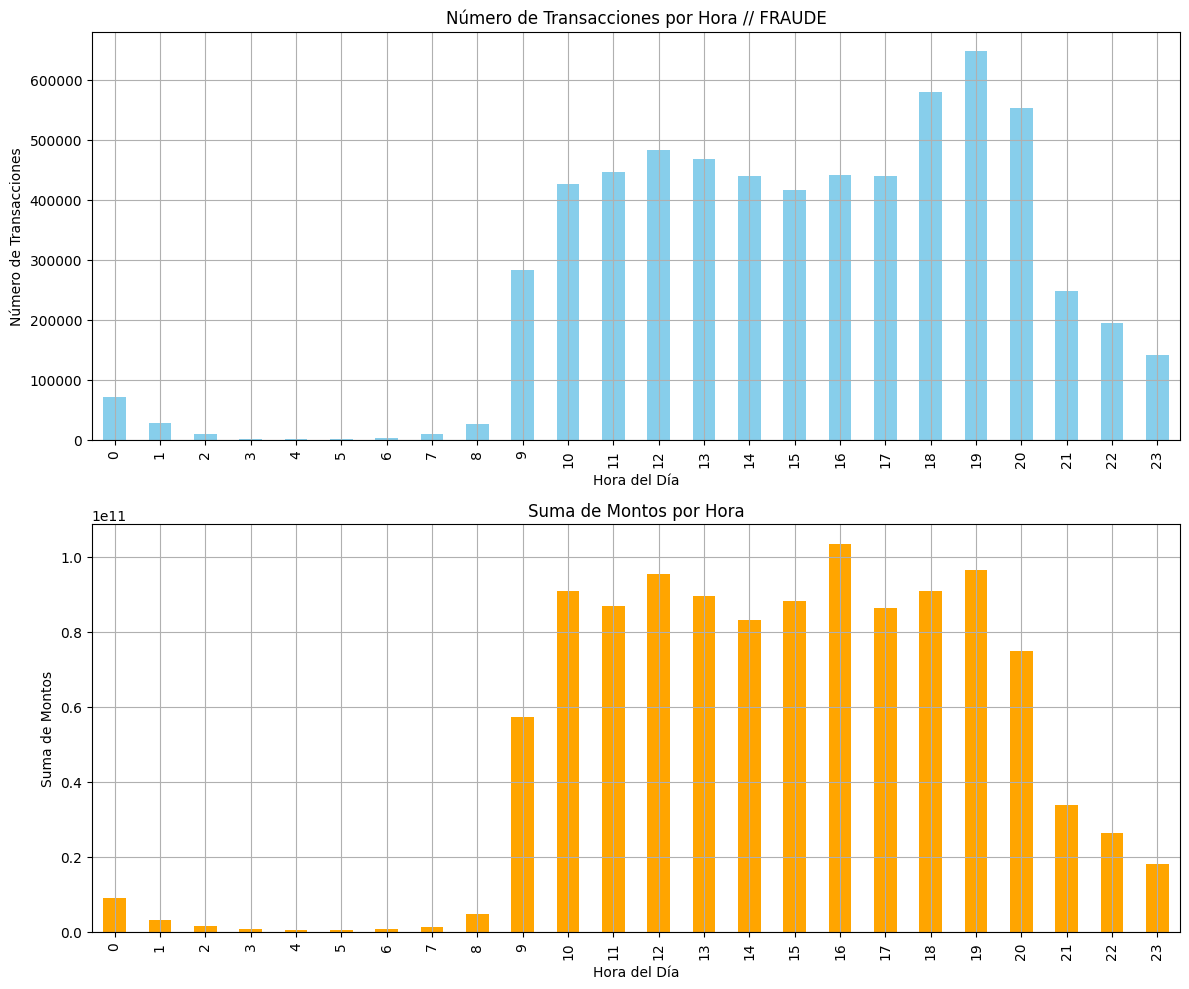

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico para el número de transacciones por hora
agrupado_por_hora['transaction_count'].plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Número de Transacciones por Hora // FRAUDE')
ax[0].set_xlabel('Hora del Día')
ax[0].set_ylabel('Número de Transacciones')
ax[0].grid(True)

# Gráfico para la suma de los montos por hora
agrupado_por_hora['amount'].plot(kind='bar', ax=ax[1], color='orange')
ax[1].set_title('Suma de Montos por Hora')
ax[1].set_xlabel('Hora del Día')
ax[1].set_ylabel('Suma de Montos')
ax[1].grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()



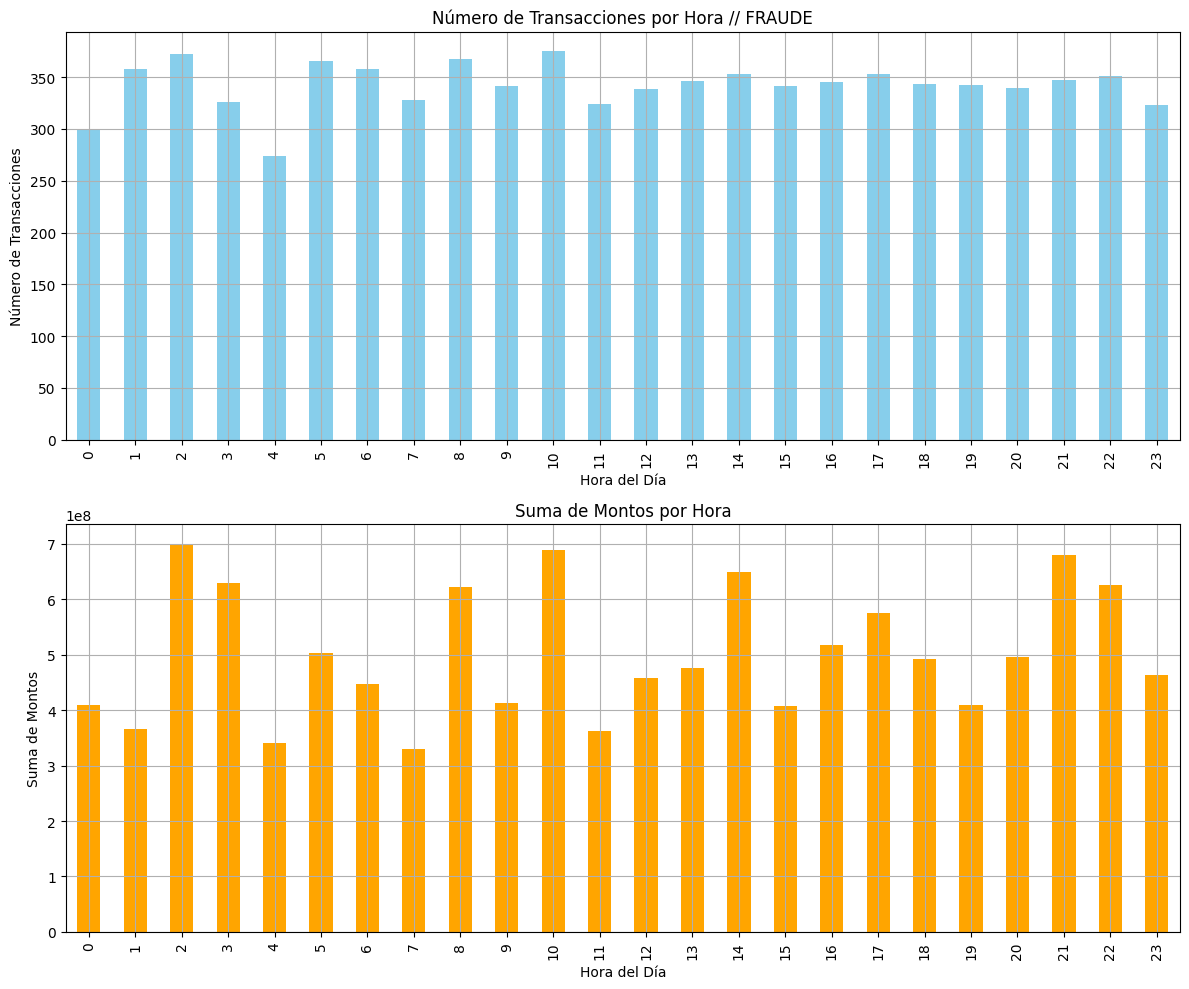

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico para el número de transacciones por hora
agrupado_por_hora_fraude['transaction_count'].plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Número de Transacciones por Hora // FRAUDE')
ax[0].set_xlabel('Hora del Día')
ax[0].set_ylabel('Número de Transacciones')
ax[0].grid(True)

# Gráfico para la suma de los montos por hora
agrupado_por_hora_fraude['amount'].plot(kind='bar', ax=ax[1], color='orange')
ax[1].set_title('Suma de Montos por Hora')
ax[1].set_xlabel('Hora del Día')
ax[1].set_ylabel('Suma de Montos')
ax[1].grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [28]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 17 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  type2           object 
 12  hora_del_dia    int64  
 13  dia             int64  
 14  horario         object 
 15  rango_fondo     object 
 16  intento_vaciar  int64  
dtypes: float64(5), int64(6), object(6)
memory usage: 825.2+ MB


#**3. Exploración de Datos**


---


In [29]:
df_banco.head(10)

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud type2  \
0  M1979787155             0.0            0.00        0               0    CM   
1  M2044282225             0.0            0.00        0               0    CM   
2   C553264065             0.0            0.00        1               0    CC   
3    C38997010         21182.0            0.00        1               0    CC   
4  M1230701703             0.0            0.00        0               0    CM   
5   M573487274             0.0            0.00        0               0    CM   
6   M408069119             0.0            0.00        0               0    CM   
7   M633326333             0.0            0.00        0               0    CM   
8  M1176932104             0.0            0.00        0               0    CM   
9   C195600860         41898.0        40348.79        0               0    CC   

   hora_del_dia  dia    horario rango_fondo  intento_vaciar  
0             1    1  Madrugada   Sin_saldo               0  
1             1    1  Madrugada   Sin_saldo               0  
2             1    1  Madrugada   Sin_saldo               1  
3             1    1  Madrugada   Con_saldo               1  
4             1    1  Madrugada   Sin_saldo               0  
5             1    1  Madrugada   Sin_saldo               0  
6             1    1  Madrugada   Sin_saldo               0  
7             1    1  Madrugada   Sin_saldo               0  
8             1    1  Madrugada   Sin_saldo               1  
9             1    1  Madrugada   Con_saldo               0

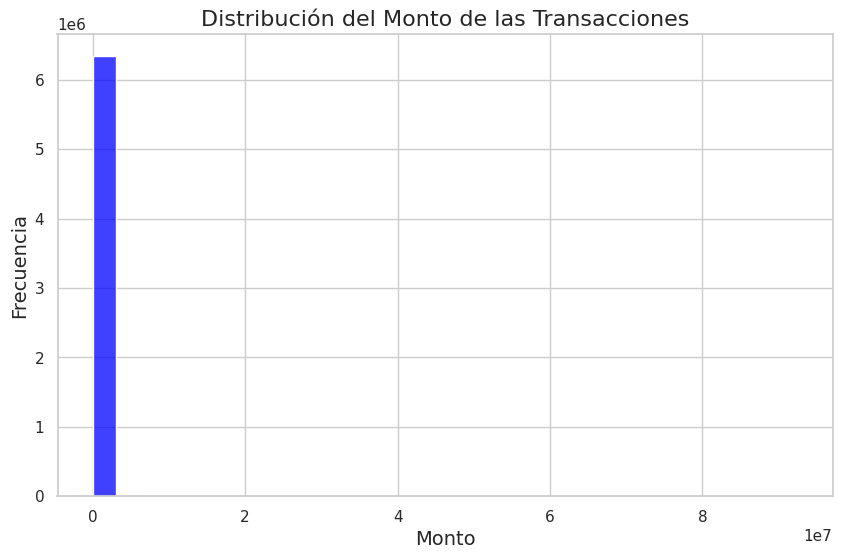

In [30]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.histplot(data=df_banco, x='amount', bins=30, kde=False, color='blue')

plt.title('Distribución del Monto de las Transacciones', fontsize=16)
plt.xlabel('Monto', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.show()

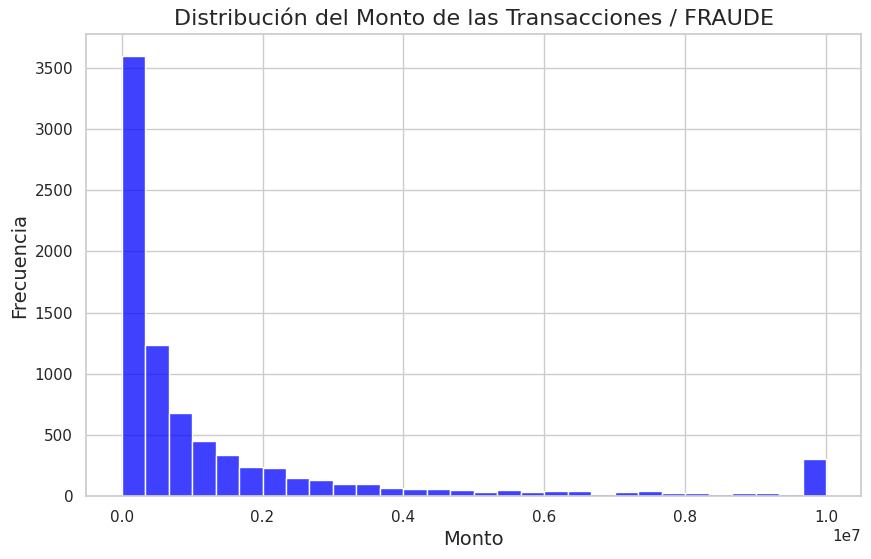

In [31]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.histplot(data=df_fraude, x='amount', bins=30, kde=False, color='blue')

plt.title('Distribución del Monto de las Transacciones / FRAUDE', fontsize=16)
plt.xlabel('Monto', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.show()

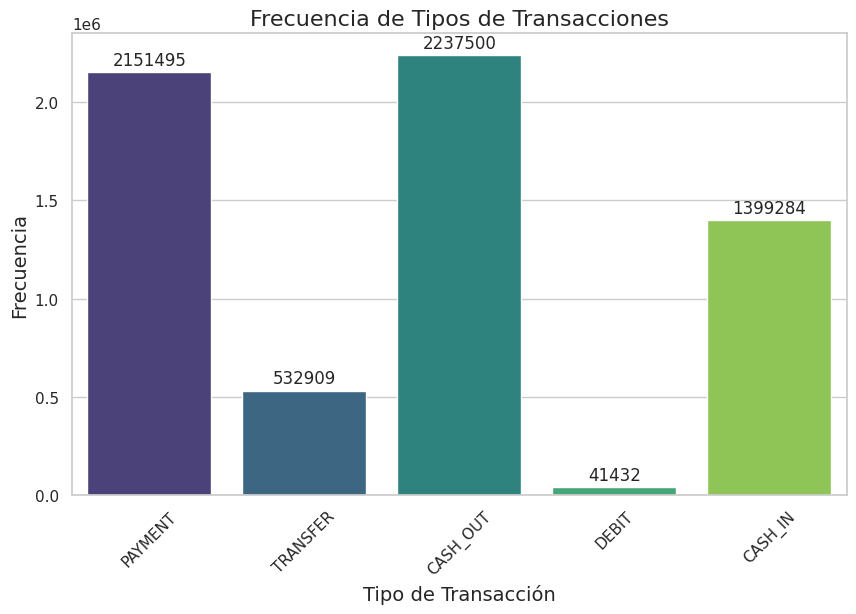

In [32]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_banco, x='type', palette='viridis')

plt.title('Frecuencia de Tipos de Transacciones', fontsize=16)
plt.xlabel('Tipo de Transacción', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

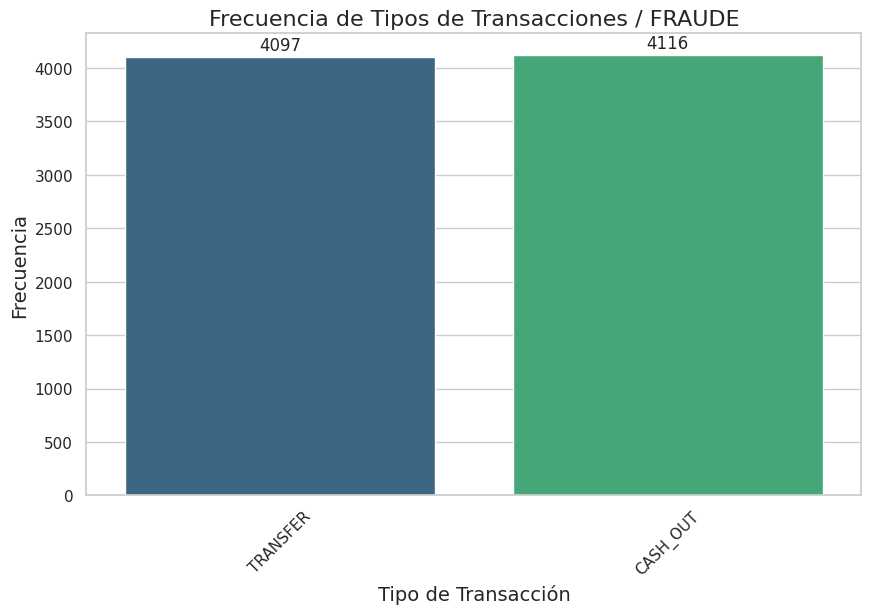

In [33]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_fraude, x='type', palette='viridis')

plt.title('Frecuencia de Tipos de Transacciones / FRAUDE', fontsize=16)
plt.xlabel('Tipo de Transacción', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

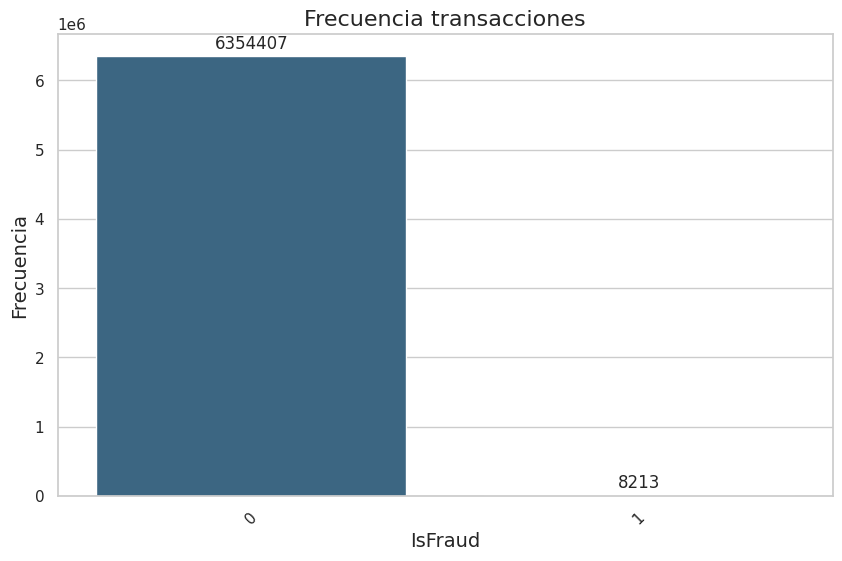

In [34]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_banco, x='isFraud', palette='viridis')

plt.title('Frecuencia transacciones', fontsize=16)
plt.xlabel('IsFraud', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

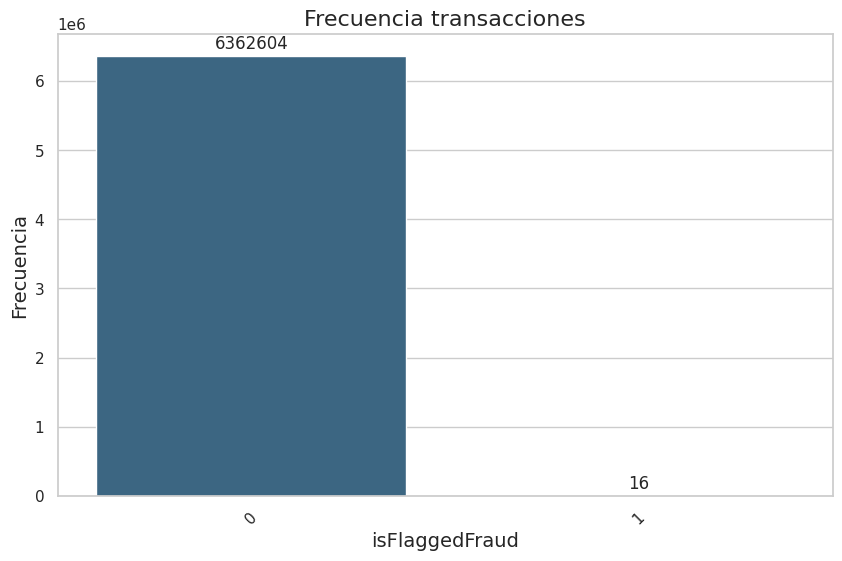

In [35]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_banco, x='isFlaggedFraud', palette='viridis')

plt.title('Frecuencia transacciones', fontsize=16)
plt.xlabel('isFlaggedFraud', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

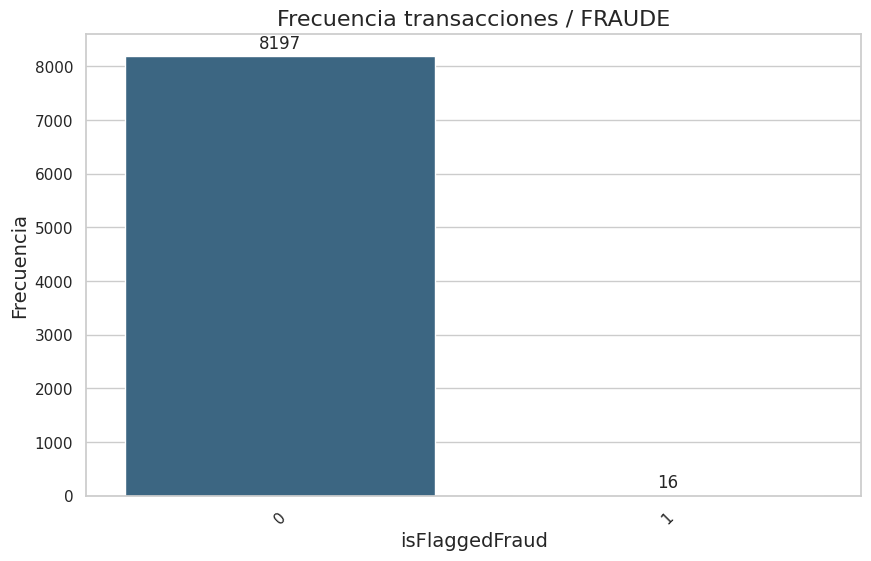

In [36]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_fraude, x='isFlaggedFraud', palette='viridis')

plt.title('Frecuencia transacciones / FRAUDE', fontsize=16)
plt.xlabel('isFlaggedFraud', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

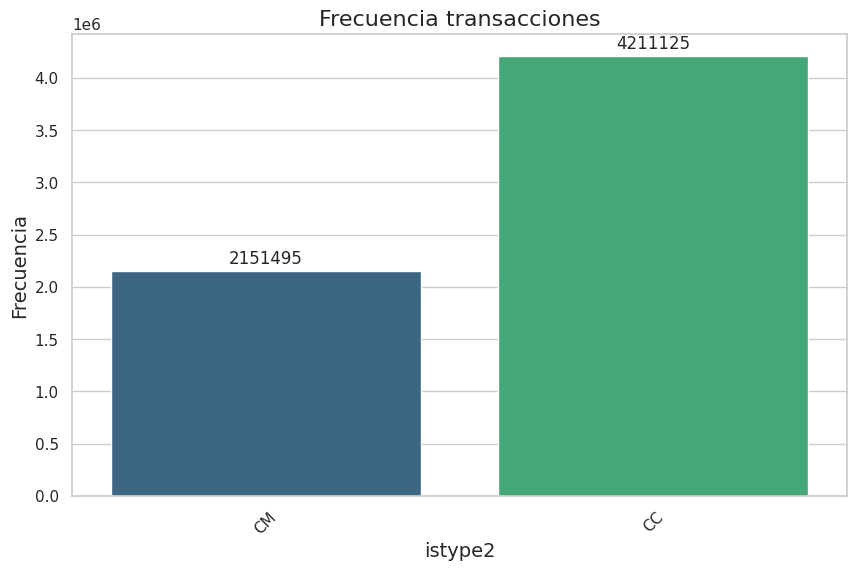

In [37]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_banco, x='type2', palette='viridis')

plt.title('Frecuencia transacciones', fontsize=16)
plt.xlabel('istype2', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

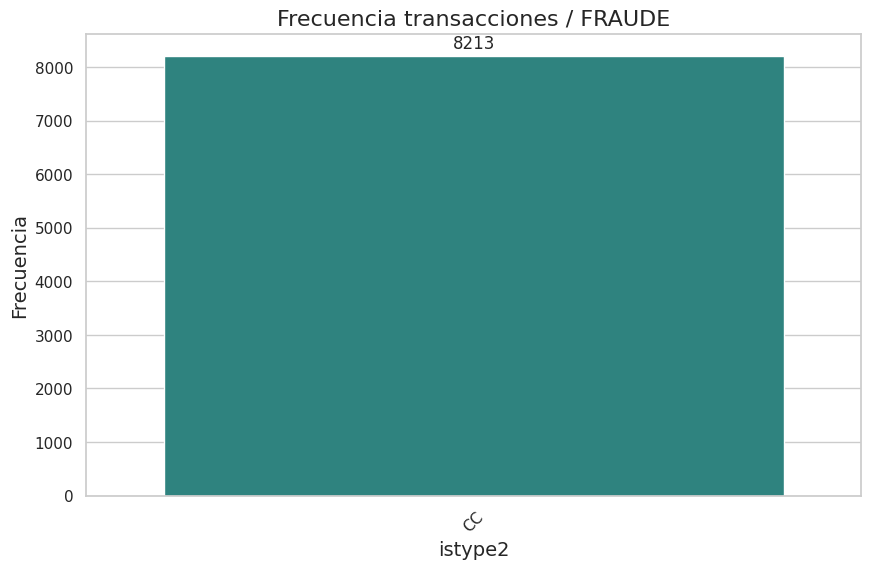

In [38]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_fraude, x='type2', palette='viridis')

plt.title('Frecuencia transacciones / FRAUDE', fontsize=16)
plt.xlabel('istype2', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

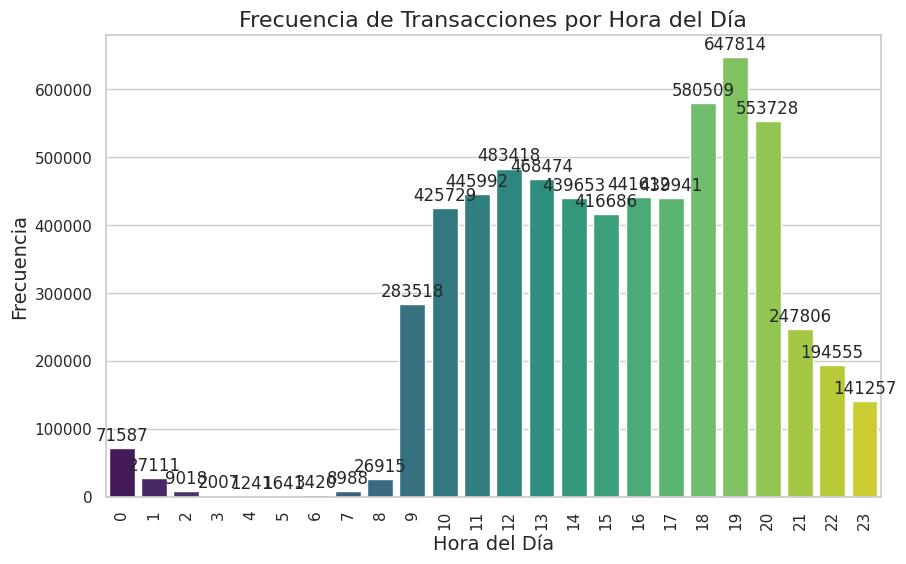

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_banco, x='hora_del_dia', palette='viridis')

plt.title('Frecuencia de Transacciones por Hora del Día', fontsize=16)
plt.xlabel('Hora del Día', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar las etiquetas del eje x para que estén verticales
plt.xticks(rotation=90)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

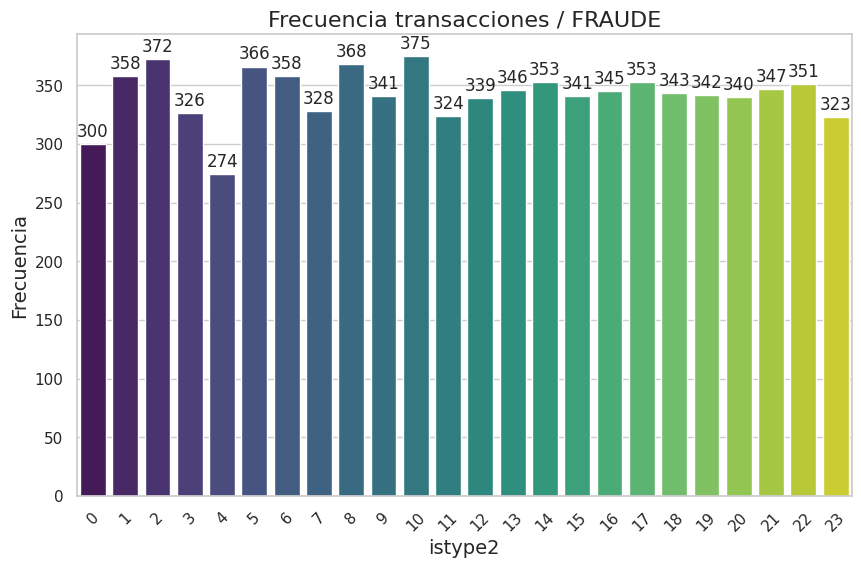

In [40]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_fraude, x='hora_del_dia', palette='viridis')

plt.title('Frecuencia transacciones / FRAUDE', fontsize=16)
plt.xlabel('istype2', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

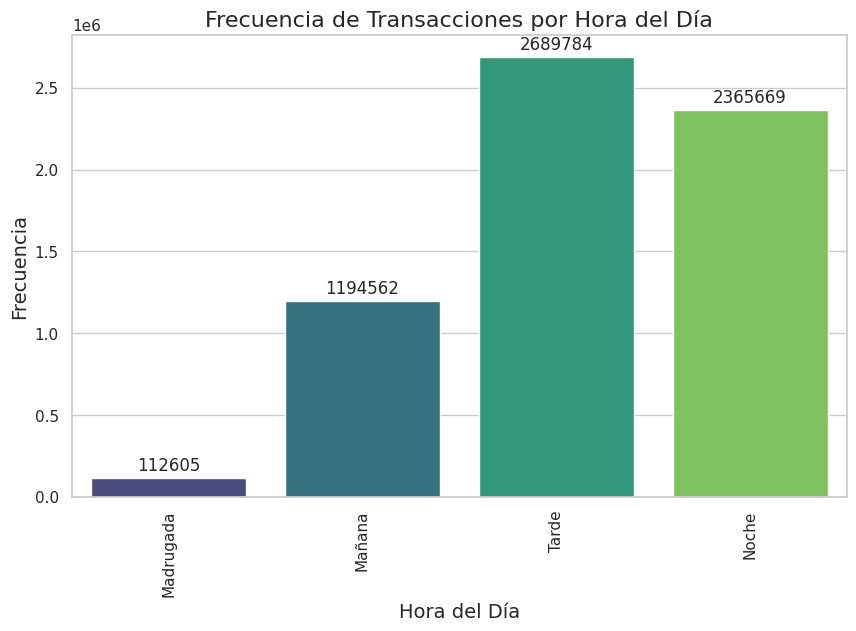

In [41]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_banco, x='horario', palette='viridis')

plt.title('Frecuencia de Transacciones por Hora del Día', fontsize=16)
plt.xlabel('Hora del Día', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar las etiquetas del eje x para que estén verticales
plt.xticks(rotation=90)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

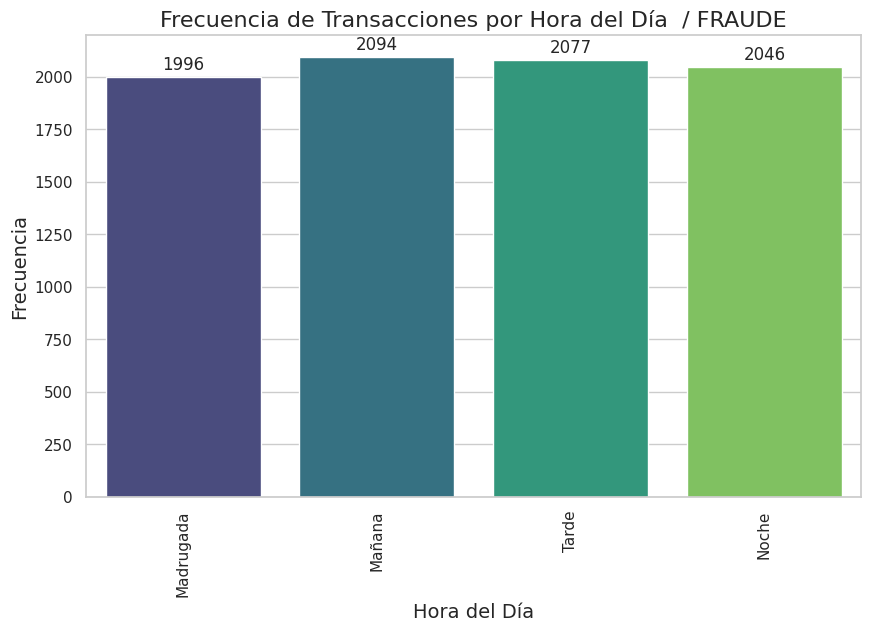

In [42]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_fraude, x='horario', palette='viridis')

plt.title('Frecuencia de Transacciones por Hora del Día  / FRAUDE', fontsize=16)
plt.xlabel('Hora del Día', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar las etiquetas del eje x para que estén verticales
plt.xticks(rotation=90)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

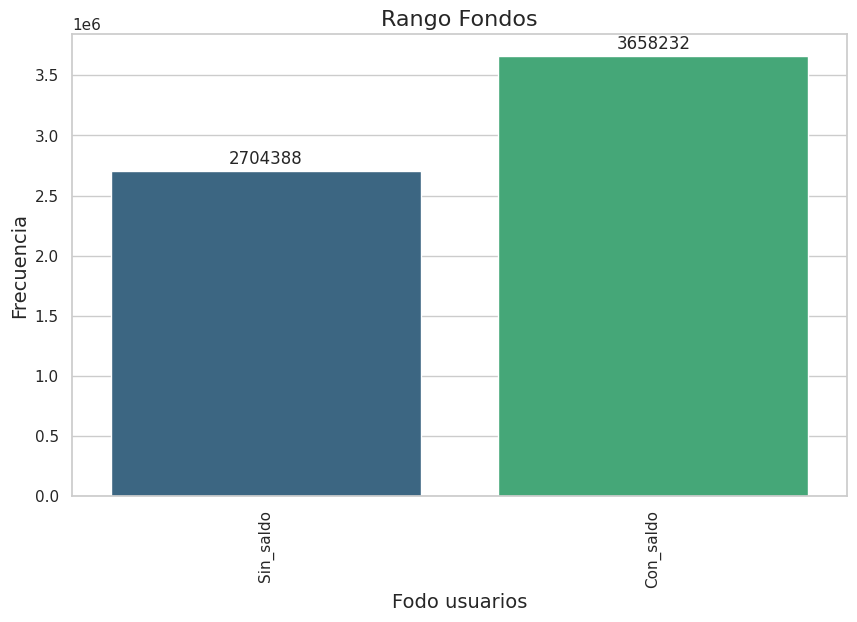

In [43]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_banco, x='rango_fondo', palette='viridis')

plt.title('Rango Fondos', fontsize=16)
plt.xlabel('Fodo usuarios', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar las etiquetas del eje x para que estén verticales
plt.xticks(rotation=90)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

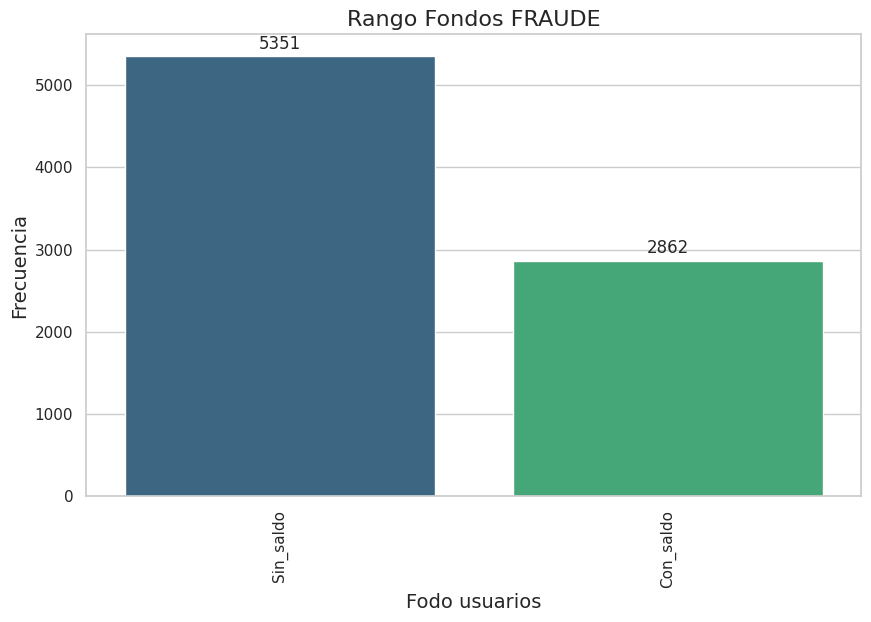

In [44]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_fraude, x='rango_fondo', palette='viridis')

plt.title('Rango Fondos FRAUDE', fontsize=16)
plt.xlabel('Fodo usuarios', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar las etiquetas del eje x para que estén verticales
plt.xticks(rotation=90)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

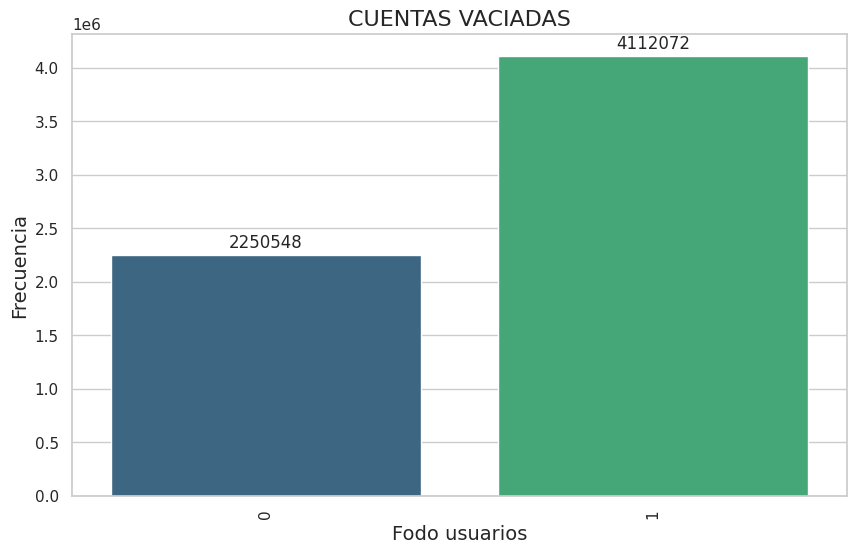

In [45]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_banco, x='intento_vaciar', palette='viridis')

plt.title('CUENTAS VACIADAS', fontsize=16)
plt.xlabel('Fodo usuarios', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar las etiquetas del eje x para que estén verticales
plt.xticks(rotation=90)

# Añadir anotaciones a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

**Descripción Original de los datos**

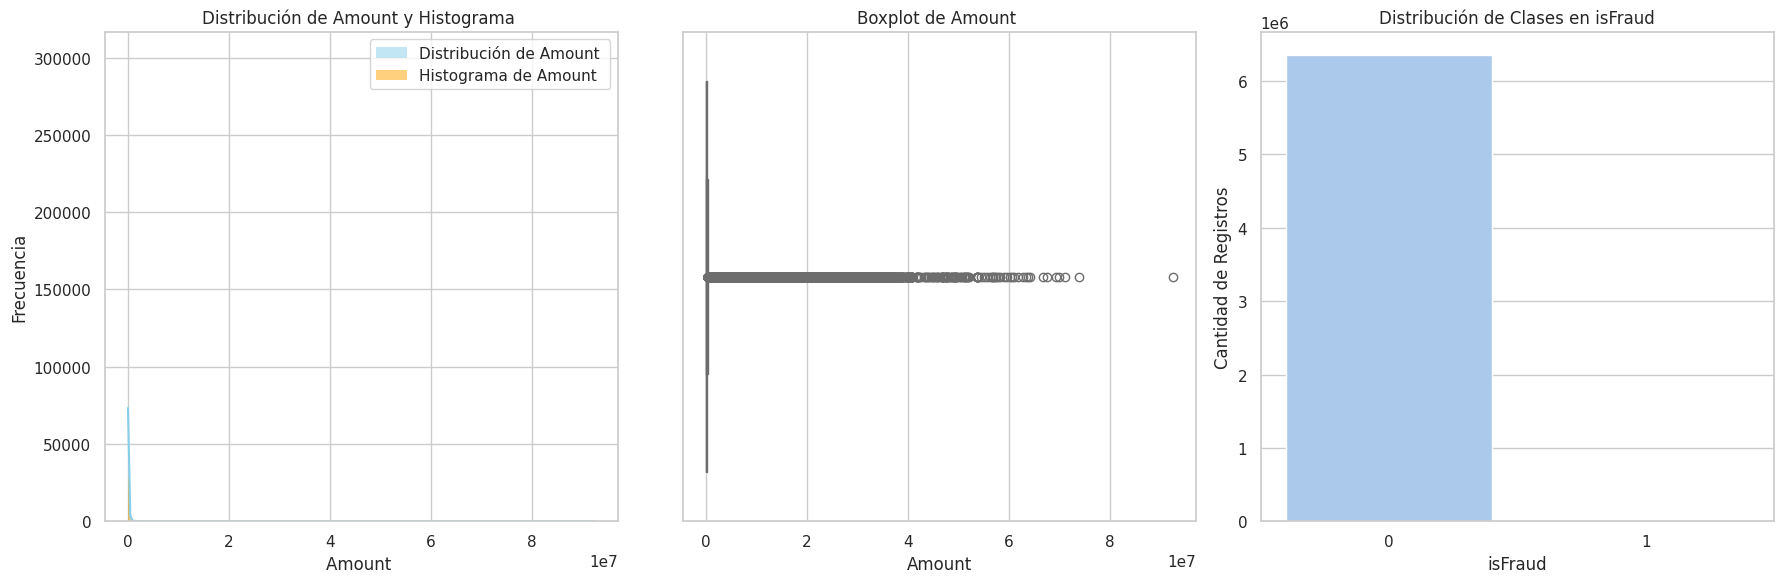

In [46]:
# Crear figura y ejes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Graficar la distribución de 'amount' escalado
sns.histplot(data=df_banco, x='amount', kde=True, ax=axes[0], color='skyblue', label='Distribución de Amount ')
sns.histplot(data=df_banco, x='amount', kde=False, ax=axes[0], color='orange', alpha=0.5, label='Histograma de Amount ')

# Configuración del primer gráfico
axes[0].set_title('Distribución de Amount y Histograma ')
axes[0].set_xlabel('Amount ')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

# Graficar el boxplot de 'amount' en horizontal
sns.boxplot(data=df_banco, x='amount', ax=axes[1], color='salmon')
axes[1].set_title('Boxplot de Amount ')
axes[1].set_xlabel('Amount')


# Graficar la distribución de clases en 'isFraud'
sns.countplot(data=df_banco, x='isFraud', ax=axes[2], palette='pastel')
axes[2].set_title('Distribución de Clases en isFraud')
axes[2].set_xlabel('isFraud')
axes[2].set_ylabel('Cantidad de Registros')

plt.tight_layout()
plt.show()


## Matriz de correlación de Spearman

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type2              object
hora_del_dia        int64
dia                 int64
horario            object
rango_fondo        object
intento_vaciar      int64
dtype: object


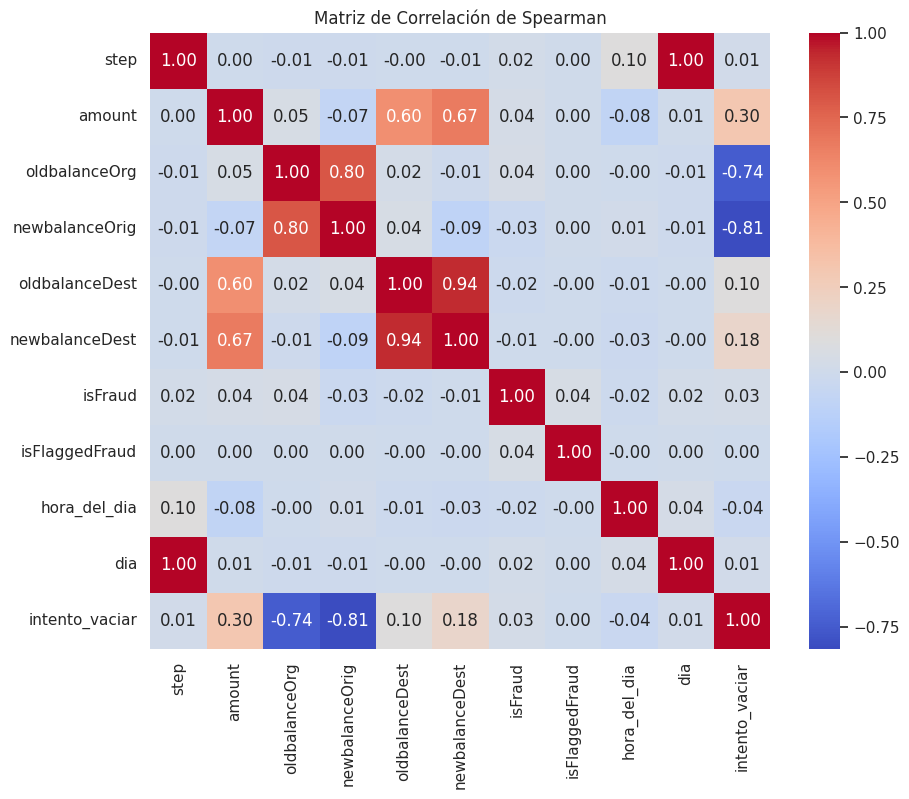

In [47]:
# Supongamos que df_banco es tu DataFrame

# 1. Verificar los tipos de datos
print(df_banco.dtypes)

# 2. Eliminar filas con valores faltantes (opcional)
df_banco_clean = df_banco.dropna()

# Alternativamente, puedes llenar los valores faltantes
# df_banco_clean = df_banco.fillna(0)  # o cualquier otro método de imputación

# 3. Seleccionar solo columnas numéricas
df_banco_numeric = df_banco_clean.select_dtypes(include=['number'])

# Calcular la matriz de correlación de Spearman
corr_spearman = df_banco_numeric.corr(method='spearman')

# Graficar la matriz de correlación de Spearman (si deseas hacerlo)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Spearman')
plt.show()

DETALLES ENCONTRADOS

*   se identifica que el fraude se aglutina solo en dos tipso de canales que es:

CASH OUT  y transfer.

Se ha identificado que los fraudes se concentran principalmente en dos tipos de transacciones: CASH OUT y TRANSFER. Estos canales han mostrado una incidencia significativamente mayor de actividades fraudulentas en comparación con otros métodos. Dada esta tendencia, se evalúa la viabilidad de enfocar nuestros esfuerzos de monitoreo y prevención exclusivamente en estos dos tipos de transacciones. Esta estrategia podría reducir la cantidad de falsos positivos y optimizar la eficiencia de nuestros sistemas de detección de fraude.

Además, no se considera prudente incluir otros canales en el análisis debido a sus características inherentes, las cuales podrían no representa un riesgo potencial.

In [48]:
df_filtrada_canales= df_banco[df_banco['type'].isin(['CASH_OUT', 'TRANSFER'])]
df_filtrada_canales.head(5)

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2      1  TRANSFER     181.00  C1305486145          181.0             0.0   
3      1  CASH_OUT     181.00   C840083671          181.0             0.0   
15     1  CASH_OUT  229133.94   C905080434        15325.0             0.0   
19     1  TRANSFER  215310.30  C1670993182          705.0             0.0   
24     1  TRANSFER  311685.89  C1984094095        10835.0             0.0   

       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
2    C553264065             0.0            0.00        1               0   
3     C38997010         21182.0            0.00        1               0   
15   C476402209          5083.0        51513.44        0               0   
19  C1100439041         22425.0            0.00        0               0   
24   C932583850          6267.0      2719172.89        0               0   

   type2  hora_del_dia  dia    horario rango_fondo  intento_vaciar  
2     CC             1    1  Madrugada   Sin_saldo               1  
3     CC             1    1  Madrugada   Con_saldo               1  
15    CC             1    1  Madrugada   Con_saldo               1  
19    CC             1    1  Madrugada   Con_saldo               1  
24    CC             1    1  Madrugada   Con_saldo               1

In [49]:
df_filtrada_canales.to_csv('df_fraude_finaciero.csv', index=False)
df_filtrada_canales.head()

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2      1  TRANSFER     181.00  C1305486145          181.0             0.0   
3      1  CASH_OUT     181.00   C840083671          181.0             0.0   
15     1  CASH_OUT  229133.94   C905080434        15325.0             0.0   
19     1  TRANSFER  215310.30  C1670993182          705.0             0.0   
24     1  TRANSFER  311685.89  C1984094095        10835.0             0.0   

       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
2    C553264065             0.0            0.00        1               0   
3     C38997010         21182.0            0.00        1               0   
15   C476402209          5083.0        51513.44        0               0   
19  C1100439041         22425.0            0.00        0               0   
24   C932583850          6267.0      2719172.89        0               0   

   type2  hora_del_dia  dia    horario rango_fondo  intento_vaciar  
2     CC             1    1  Madrugada   Sin_saldo               1  
3     CC             1    1  Madrugada   Con_saldo               1  
15    CC             1    1  Madrugada   Con_saldo               1  
19    CC             1    1  Madrugada   Con_saldo               1  
24    CC             1    1  Madrugada   Con_saldo               1

In [50]:
df_filtrada_canales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770409 entries, 2 to 6362619
Data columns (total 17 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  type2           object 
 12  hora_del_dia    int64  
 13  dia             int64  
 14  horario         object 
 15  rango_fondo     object 
 16  intento_vaciar  int64  
dtypes: float64(5), int64(6), object(6)
memory usage: 380.5+ MB


### Transformaciòn con get_dummies

In [51]:
# Columnas para las cuales generar dummies
cols_to_dummies = ['type', 'type2', 'horario', 'rango_fondo']


df_filtrada_canales['isFraud'] = df_filtrada_canales['isFraud'].astype('int')
df_filtrada_canales['isFlaggedFraud'] = df_filtrada_canales['isFlaggedFraud'].astype('int')

df_dummies = pd.get_dummies(df_filtrada_canales[cols_to_dummies])

df_final = pd.concat([df_filtrada_canales.drop(cols_to_dummies, axis=1), df_dummies], axis=1)

In [52]:
df_final.head(10)

step     amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
2      1     181.00  C1305486145         181.00             0.0   C553264065   
3      1     181.00   C840083671         181.00             0.0    C38997010   
15     1  229133.94   C905080434       15325.00             0.0   C476402209   
19     1  215310.30  C1670993182         705.00             0.0  C1100439041   
24     1  311685.89  C1984094095       10835.00             0.0   C932583850   
42     1  110414.71   C768216420       26845.41             0.0  C1509514333   
47     1   56953.90  C1570470538        1942.02             0.0   C824009085   
48     1    5346.89   C512549200           0.00             0.0   C248609774   
51     1   23261.30  C2072313080       20411.53             0.0  C2001112025   
58     1   62610.80  C1976401987       79114.00         16503.2  C1937962514   

    oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  hora_del_dia  \
2              0.0            0.00        1               0             1   
3          21182.0            0.00        1               0             1   
15          5083.0        51513.44        0               0             1   
19         22425.0            0.00        0               0             1   
24          6267.0      2719172.89        0               0             1   
42        288800.0         2415.16        0               0             1   
47         70253.0        64106.18        0               0             1   
48        652637.0      6453430.91        0               0             1   
51         25742.0            0.00        0               0             1   
58           517.0         8383.29        0               0             1   

    dia  intento_vaciar  type_CASH_OUT  type_TRANSFER  type2_CC  \
2     1               1          False           True      True   
3     1               1           True          False      True   
15    1               1           True          False      True   
19    1               1          False           True      True   
24    1               1          False           True      True   
42    1               1           True          False      True   
47    1               1           True          False      True   
48    1               1           True          False      True   
51    1               1           True          False      True   
58    1               0          False           True      True   

    horario_Madrugada  horario_Mañana  horario_Noche  horario_Tarde  \
2                True           False          False          False   
3                True           False          False          False   
15               True           False          False          False   
19               True           False          False          False   
24               True           False          False          False   
42               True           False          False          False   
47               True           False          False          False   
48               True           False          False          False   
51               True           False          False          False   
58               True           False          False          False   

    rango_fondo_Con_saldo  rango_fondo_Sin_saldo  
2                   False                   True  
3                    True                  False  
15                   True                  False  
19                   True                  False  
24                   True                  False  
42                   True                  False  
47                   True                  False  
48                   True                  False  
51                   True                  False  
58                   True                  False

In [53]:
df_final = df_final[['amount','type_CASH_OUT','type_TRANSFER','type2_CC','horario_Madrugada','horario_Mañana','horario_Noche','horario_Tarde','rango_fondo_Con_saldo','rango_fondo_Sin_saldo','isFraud','intento_vaciar']]

In [54]:
df_final.head()

amount  type_CASH_OUT  type_TRANSFER  type2_CC  horario_Madrugada  \
2      181.00          False           True      True               True   
3      181.00           True          False      True               True   
15  229133.94           True          False      True               True   
19  215310.30          False           True      True               True   
24  311685.89          False           True      True               True   

    horario_Mañana  horario_Noche  horario_Tarde  rango_fondo_Con_saldo  \
2            False          False          False                  False   
3            False          False          False                   True   
15           False          False          False                   True   
19           False          False          False                   True   
24           False          False          False                   True   

    rango_fondo_Sin_saldo  isFraud  intento_vaciar  
2                    True        1               1  
3                   False        1               1  
15                  False        0               1  
19                  False        0               1  
24                  False        0               1

### Balanceo de clases

In [55]:
x = df_final.drop('isFraud', axis = 1)
y = df_final['isFraud']

In [56]:
smt = SMOTE(random_state = 123)
x, y = smt.fit_resample(x,y)

In [57]:
# Union de los datos balanceado
datos_final = pd.concat([x, y], axis = 1)

datos_final.head(10)

amount  type_CASH_OUT  type_TRANSFER  type2_CC  horario_Madrugada  \
0     181.00          False           True      True               True   
1     181.00           True          False      True               True   
2  229133.94           True          False      True               True   
3  215310.30          False           True      True               True   
4  311685.89          False           True      True               True   
5  110414.71           True          False      True               True   
6   56953.90           True          False      True               True   
7    5346.89           True          False      True               True   
8   23261.30           True          False      True               True   
9   62610.80          False           True      True               True   

   horario_Mañana  horario_Noche  horario_Tarde  rango_fondo_Con_saldo  \
0           False          False          False                  False   
1           False          False          False                   True   
2           False          False          False                   True   
3           False          False          False                   True   
4           False          False          False                   True   
5           False          False          False                   True   
6           False          False          False                   True   
7           False          False          False                   True   
8           False          False          False                   True   
9           False          False          False                   True   

   rango_fondo_Sin_saldo  intento_vaciar  isFraud  
0                   True               1        1  
1                  False               1        1  
2                  False               1        0  
3                  False               1        0  
4                  False               1        0  
5                  False               1        0  
6                  False               1        0  
7                  False               1        0  
8                  False               1        0  
9                  False               0        0

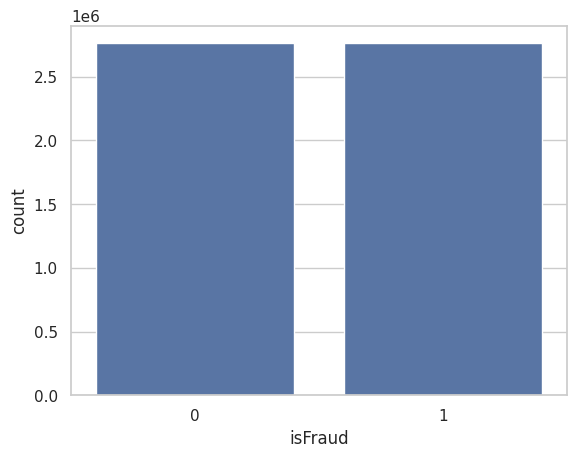

In [58]:
## Verificar el balanceo

ax = sns.countplot( x = 'isFraud', data = datos_final )

In [59]:
datos_final.isFraud.value_counts()

isFraud
1    2762196
0    2762196
Name: count, dtype: int64

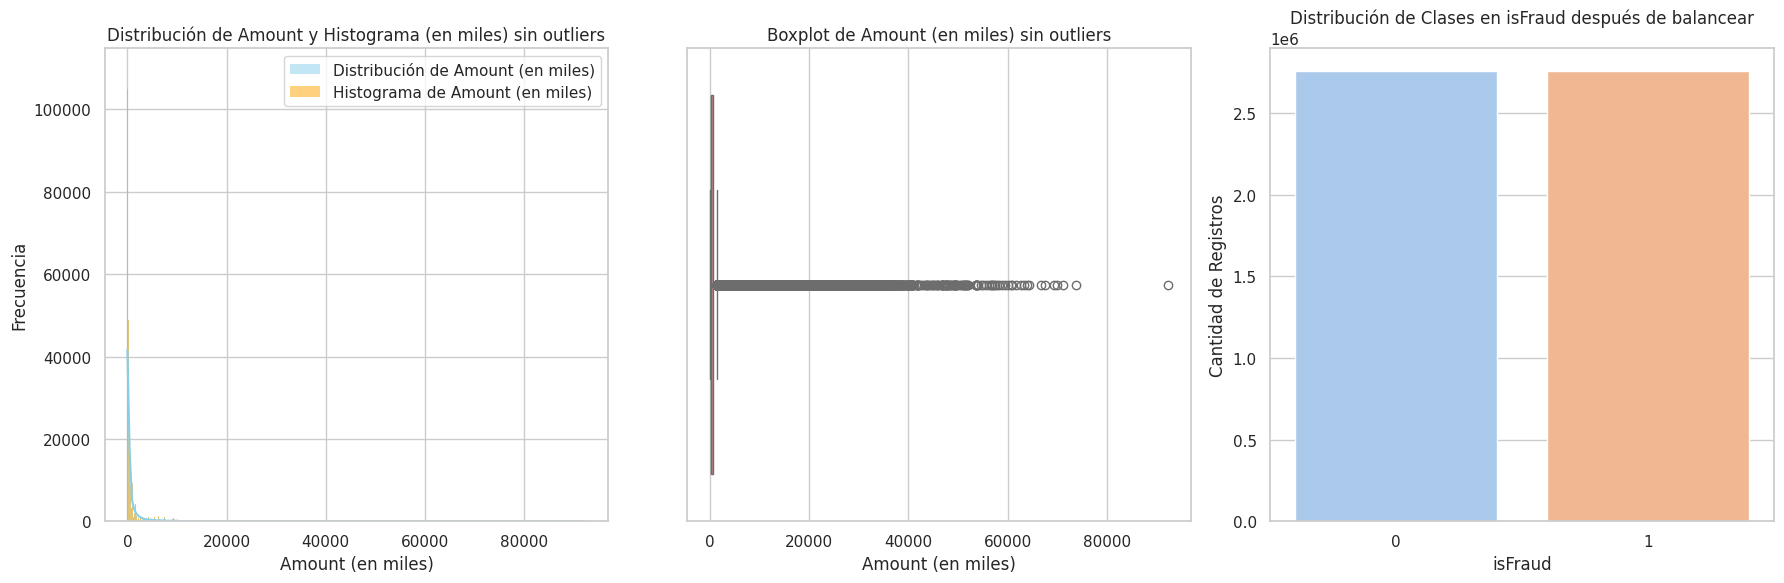

In [60]:

# Crear figura y ejes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Escalar 'amount' para mostrar en miles
df_balanced = datos_final

df_balanced['amount_scaled'] = df_balanced['amount'] / 1000

# Graficar la distribución de 'amount' escalado
sns.histplot(data=df_balanced, x='amount_scaled', kde=True, ax=axes[0], color='skyblue', label='Distribución de Amount (en miles)')
sns.histplot(data=df_balanced, x='amount_scaled', kde=False, ax=axes[0], color='orange', alpha=0.5, label='Histograma de Amount (en miles)')

# Configuración del primer gráfico
axes[0].set_title('Distribución de Amount y Histograma (en miles) sin outliers')
axes[0].set_xlabel('Amount (en miles)')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

# Graficar el boxplot de 'amount' en horizontal
sns.boxplot(data=df_balanced, x='amount_scaled', ax=axes[1], color='salmon')
axes[1].set_title('Boxplot de Amount (en miles) sin outliers')
axes[1].set_xlabel('Amount (en miles)')

# Graficar la distribución de clases en 'isFraud' después de balancear
sns.countplot(data=df_balanced, x='isFraud', ax=axes[2], palette='pastel')
axes[2].set_title('Distribución de Clases en isFraud después de balancear')
axes[2].set_xlabel('isFraud')
axes[2].set_ylabel('Cantidad de Registros')

plt.tight_layout()
plt.show()


In [61]:
#balanceo_clases()
ProfileReport(datos_final)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#**4. Construcción de Modelos**


---


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

Entrenando modelo: Regresion Logistica
Entrenando modelo: Arbol de Decision
Entrenando modelo: Random Forest
Entrenando modelo: Naive Bayes
Entrenando modelo: K-Vecinos Más Cercanos
Modelo: Regresion Logistica
Accuracy: 0.9673900844617629
Precisión: 0.988570138873128
Recall: 0.9457427084979367
F1-score: 0.966682304725139
AUC-ROC: 0.9673993360914057

Modelo: Arbol de Decision
Accuracy: 0.9920317042353972
Precisión: 0.9924497322878374
Recall: 0.9916141242658438
F1-score: 0.9920317523145691
AUC-ROC: 0.992031882700225

Modelo: Random Forest
Accuracy: 0.9920811817647549
Precisión: 0.9920430161998256
Recall: 0.9921267820890626
F1-score: 0.9920848973762677
AUC-ROC: 0.9920811622761428

Modelo: Naive Bayes
Accuracy: 0.9261041031353066
Precisión: 0.9398186304657989
Recall: 0.9105804130936427
F1-score: 0.9249685247528694
AUC-ROC: 0.9261107376313857

Modelo: K-Vecinos Más Cercanos
Accuracy: 0.9934194885954295
Precisión: 0.9933461256891168
Recall: 0.9934994988015869
F1-score: 0.9934228063255885
AUC

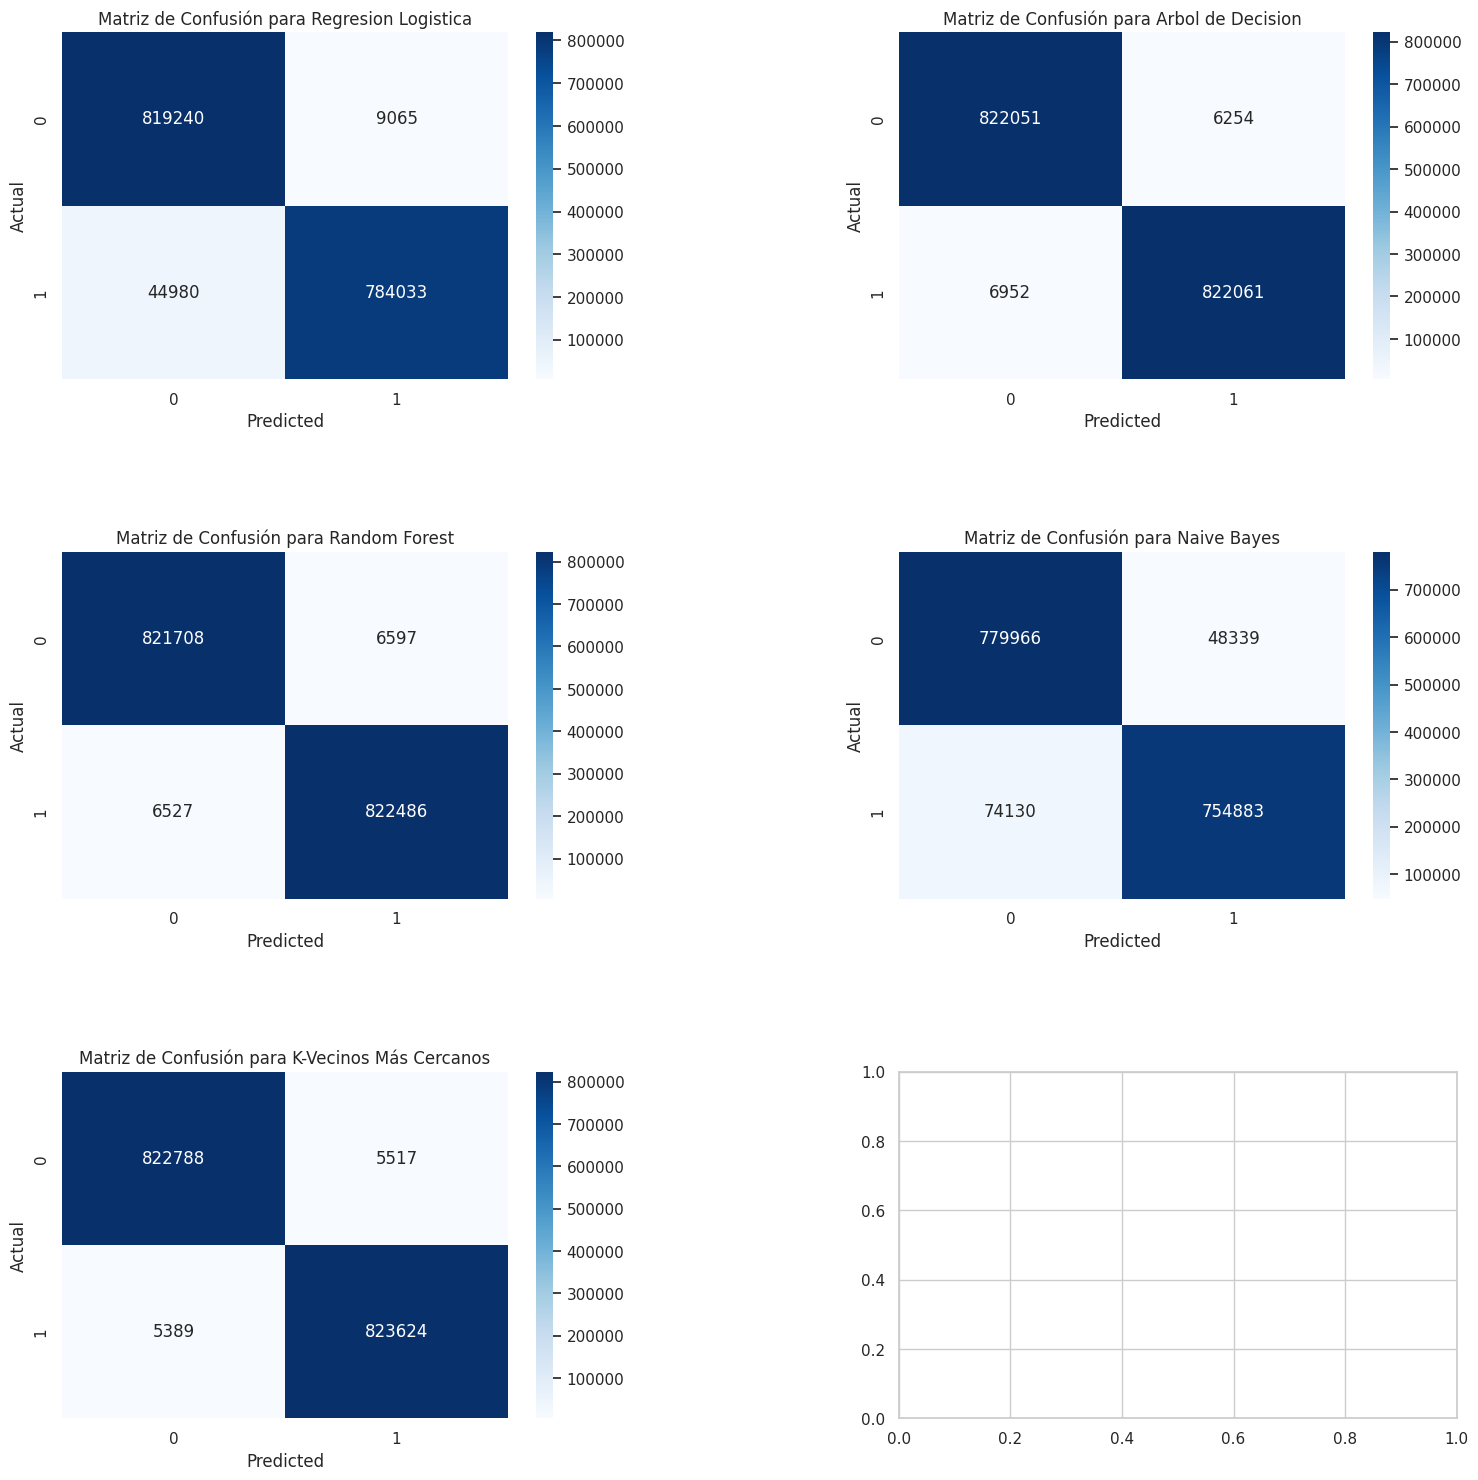

In [63]:

def crea_modelos(df_balanced):
    # Separar las características y la variable objetivo
    y = df_balanced['isFraud']
    X = df_balanced.drop(columns=['isFraud'])

    # Normalizar las características
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    # Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=77)

    # Crear listas para almacenar los resultados de cada modelo
    nombre_modelo = []
    accuracy = []
    precision = []
    recall = []
    f1_score_list = []
    auc_roc = []

    # Inicializar modelos
    modelos = {
        'Regresion Logistica': LogisticRegression(),
        'Arbol de Decision': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB(),
        'K-Vecinos Más Cercanos': KNeighborsClassifier(metric='euclidean')
    }

    # Entrenar y evaluar modelos
    fig, axs = plt.subplots(3, 2, figsize=(18, 18))
    for i, (nombre, modelo) in enumerate(modelos.items()):
        print(f"Entrenando modelo: {nombre}")
        modelo.fit(X_train, y_train)
        predictions = modelo.predict(X_test)

        # Calcular métricas de evaluación
        acc = accuracy_score(y_test, predictions)
        prec = precision_score(y_test, predictions)
        rec = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        auc = roc_auc_score(y_test, predictions)

        # Agregar resultados a las listas
        nombre_modelo.append(nombre)
        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        f1_score_list.append(f1)
        auc_roc.append(auc)

        # Imprimir la matriz de confusión
        row = i // 2
        col = i % 2
        cm = confusion_matrix(y_test, predictions)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[row, col])
        axs[row, col].set_title(f'Matriz de Confusión para {nombre}')
        axs[row, col].set_xlabel('Predicted')
        axs[row, col].set_ylabel('Actual')

    # Ajustar el espaciado horizontal y vertical entre los subgráficos
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    # Crear diccionario de resultados
    resultados = {
        'Nombre_Modelo': nombre_modelo,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1_score_list,
        'AUC_ROC': auc_roc
    }

    # Devolver los resultados
    return resultados

# Uso de la función y visualización de resultados
resultados = crea_modelos(df_balanced)
for i, model in enumerate(resultados['Nombre_Modelo']):
    print(f"Modelo: {model}")
    print(f"Accuracy: {resultados['Accuracy'][i]}")
    print(f"Precisión: {resultados['Precision'][i]}")
    print(f"Recall: {resultados['Recall'][i]}")
    print(f"F1-score: {resultados['F1_Score'][i]}")
    print(f"AUC-ROC: {resultados['AUC_ROC'][i]}\n")


In [64]:
#@title
def visualiza_resultados():
  global df_banco, resultados
  # Convertir resultados a DataFrame
  df_resultados = pd.DataFrame(resultados)
  # Transponer el DataFrame
  df_resultados = df_resultados.set_index('Nombre_Modelo').T

  # Definir colores para los modelos
  colors = ['#0077b6', '#CDDBF3', '#9370DB', '#DDA0DD', '#FF69B4']

  # Generar el gráfico de barras
  df_resultados.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

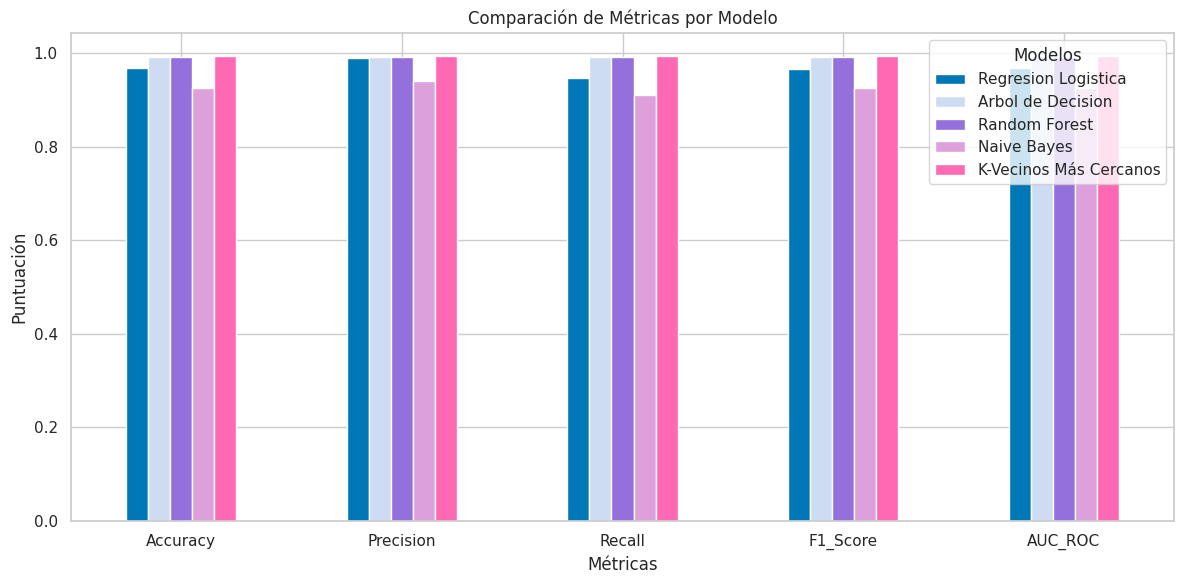

In [65]:
visualiza_resultados()